**Aim:**
This notebook reproduces the figures from **Normative Modeling of MEG Brain Oscillations Across the Human Lifespan** using the data provided in the data folder.

In [1]:
import matplotlib.pyplot as plt
import json
import pickle as pkl
import pandas as pd
import numpy as np
import meganorm
import os

# Figure 2

### Figure 2a

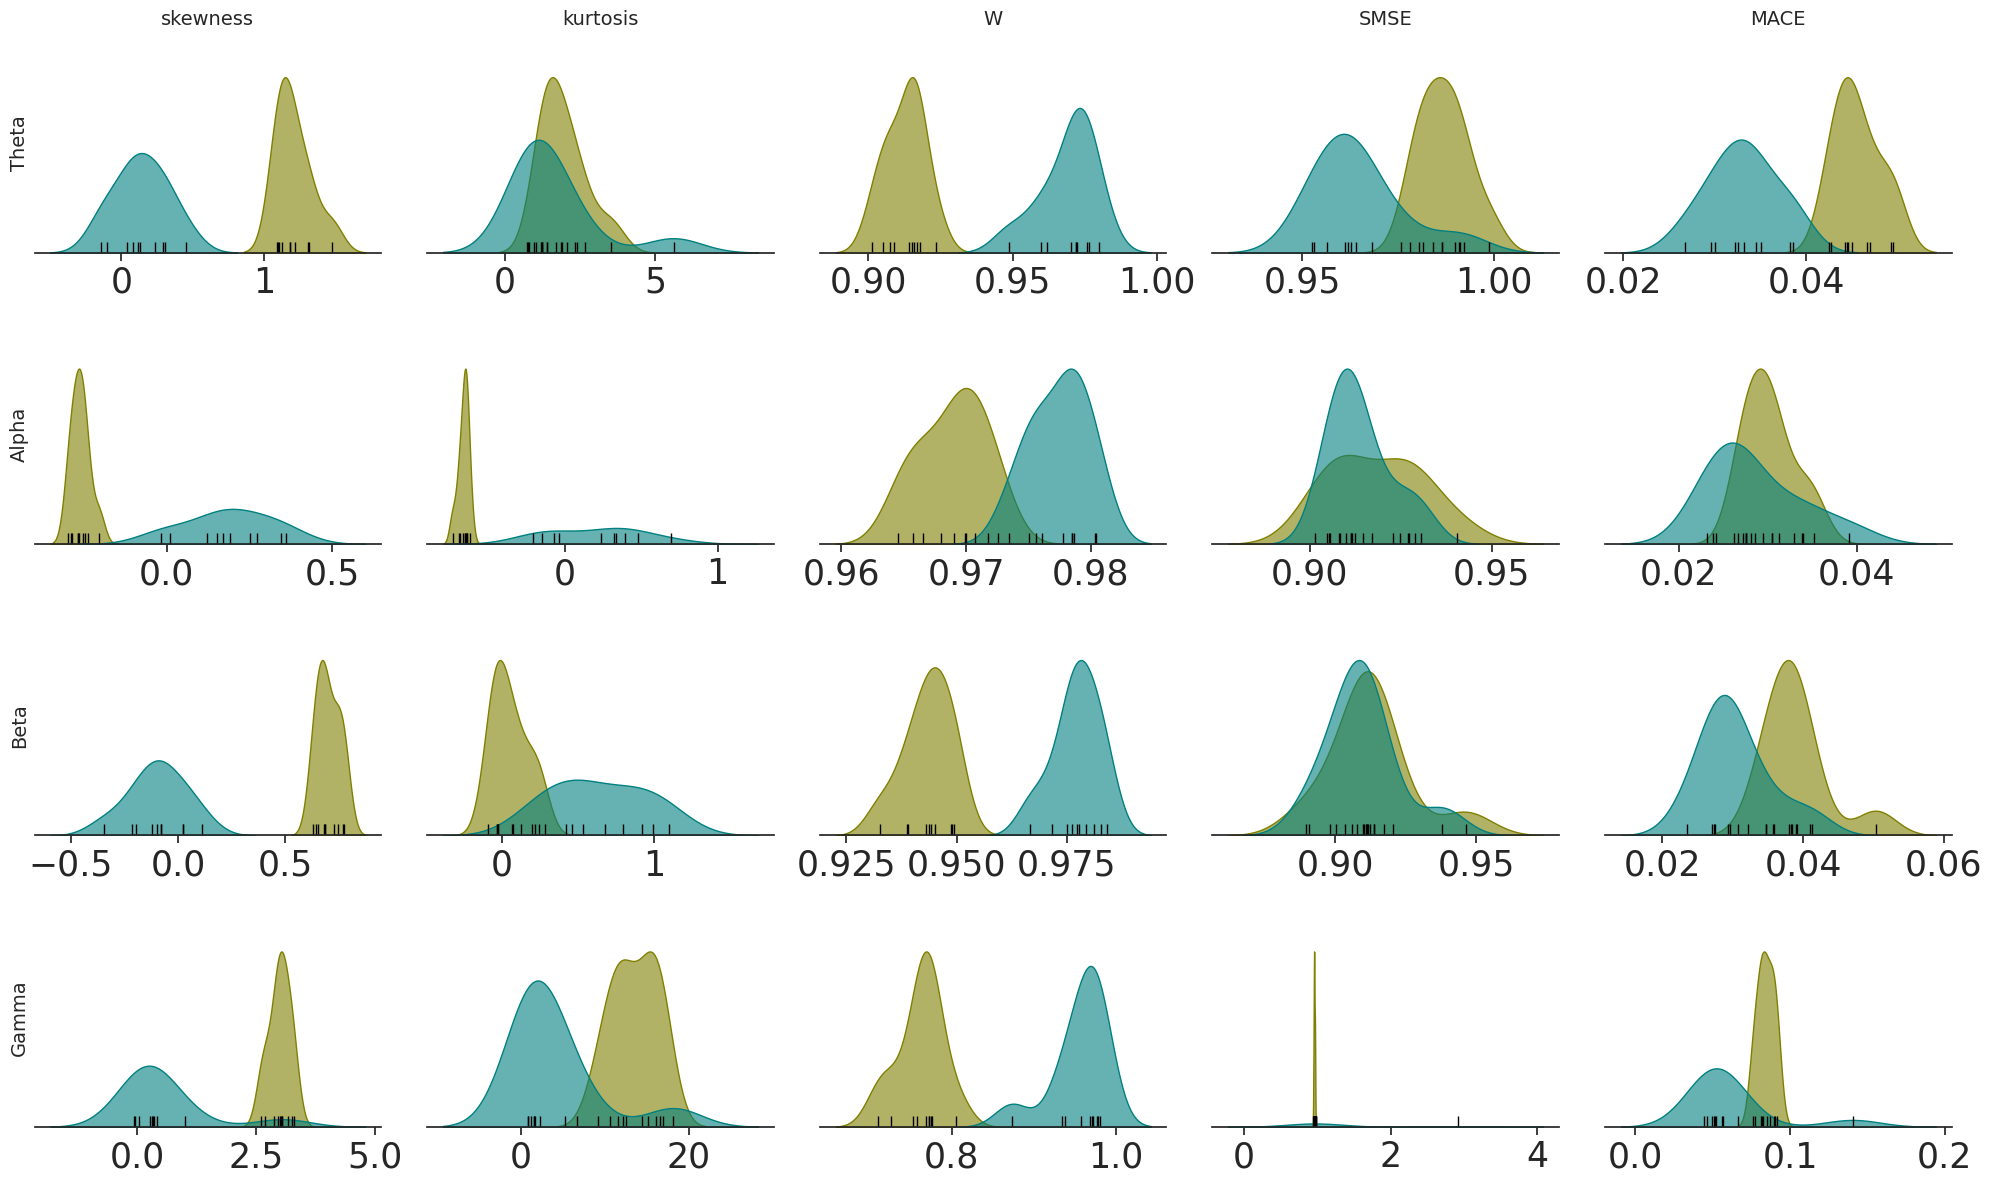

In [2]:
from meganorm.plots.plots import plot_metrics

figure_2a_data_path = "data/figure_2/figure_2a"
metrics_summary_path = [os.path.join(figure_2a_data_path, file) for file in os.listdir(figure_2a_data_path)]

plot_metrics(metrics_summary_path,
                 which_biomarkers=[
        "Adjusted_Canonical_Relative_PowerTheta_all",
    "Adjusted_Canonical_Relative_PowerAlpha_all",
    "Adjusted_Canonical_Relative_PowerBeta_all",
    "Adjusted_Canonical_Relative_PowerGamma_all"],
    biomarkers_new_name=["Theta", "Alpha", "Beta", "Gamma"],
    colors=["olive", "teal"],
    save_path=None)

### Figure 2b

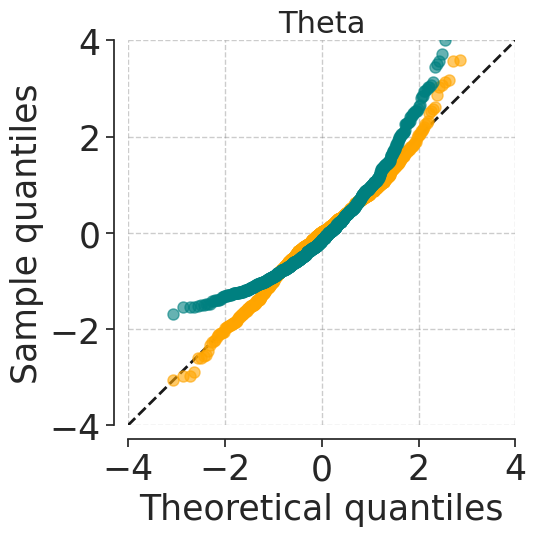

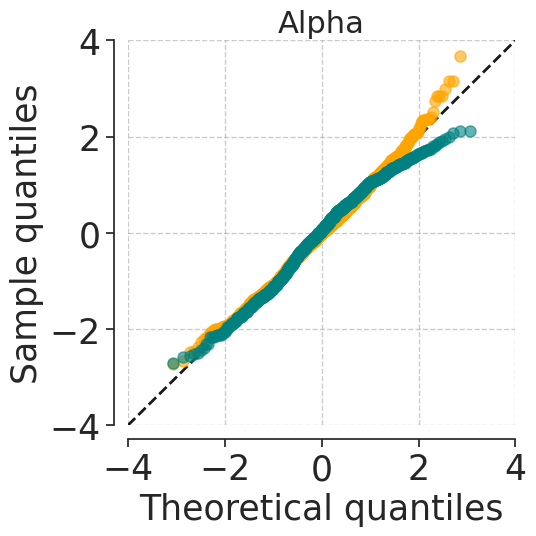

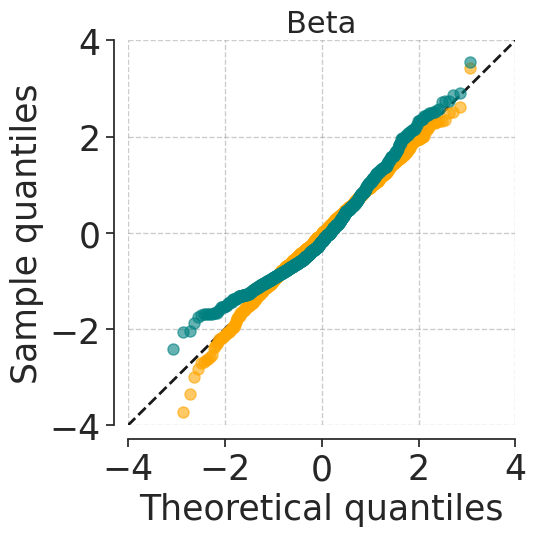

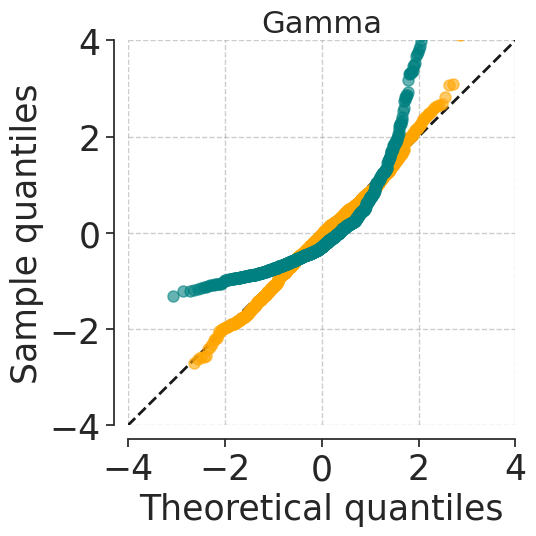

In [3]:
from meganorm.plots.plots import qq_plot

figure_2b_data_path = "data/figure_2/figure_2b" 
deviations_path = [os.path.join(figure_2b_data_path, file) for file in os.listdir(figure_2b_data_path)]


label_dict = {"Theta": 0, "Alpha": 1, "Beta": 2, "Gamma": 3}
z_scores_dict = qq_plot(processing_dir=deviations_path,
        save_fig=None,
        label_dict=label_dict,
        colors=["orange", "teal", "olive", "tomato"])

# Figure 3

### Figure 3b

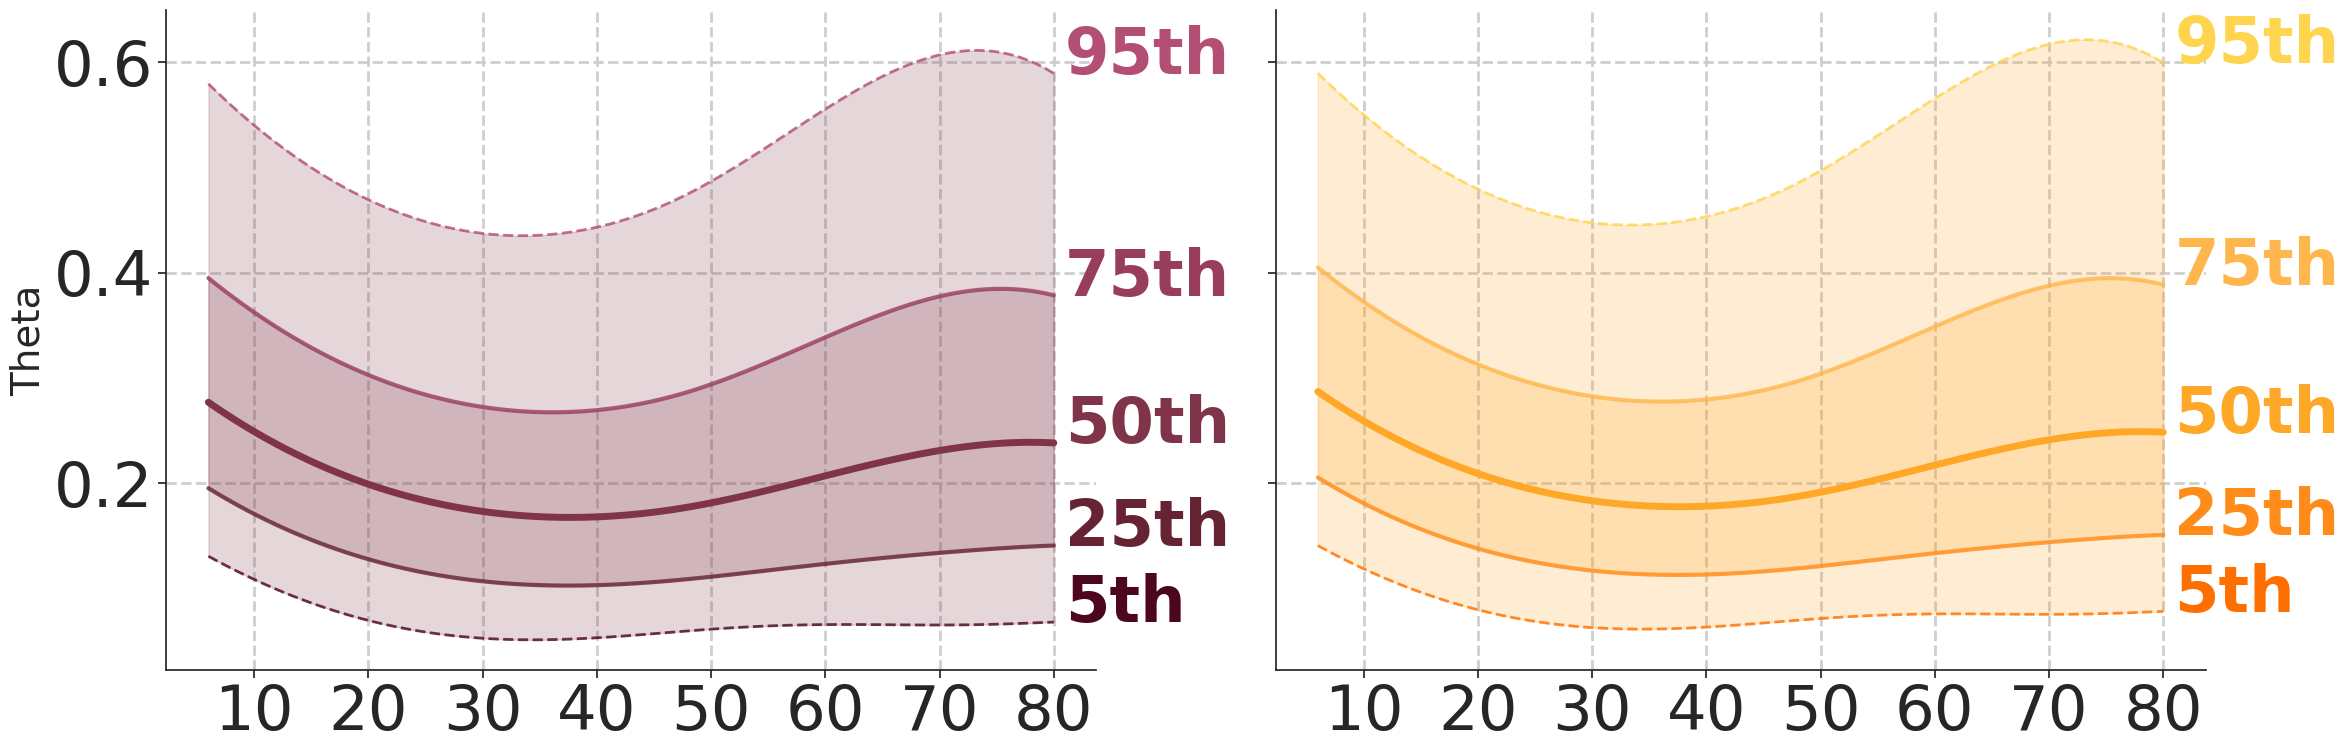

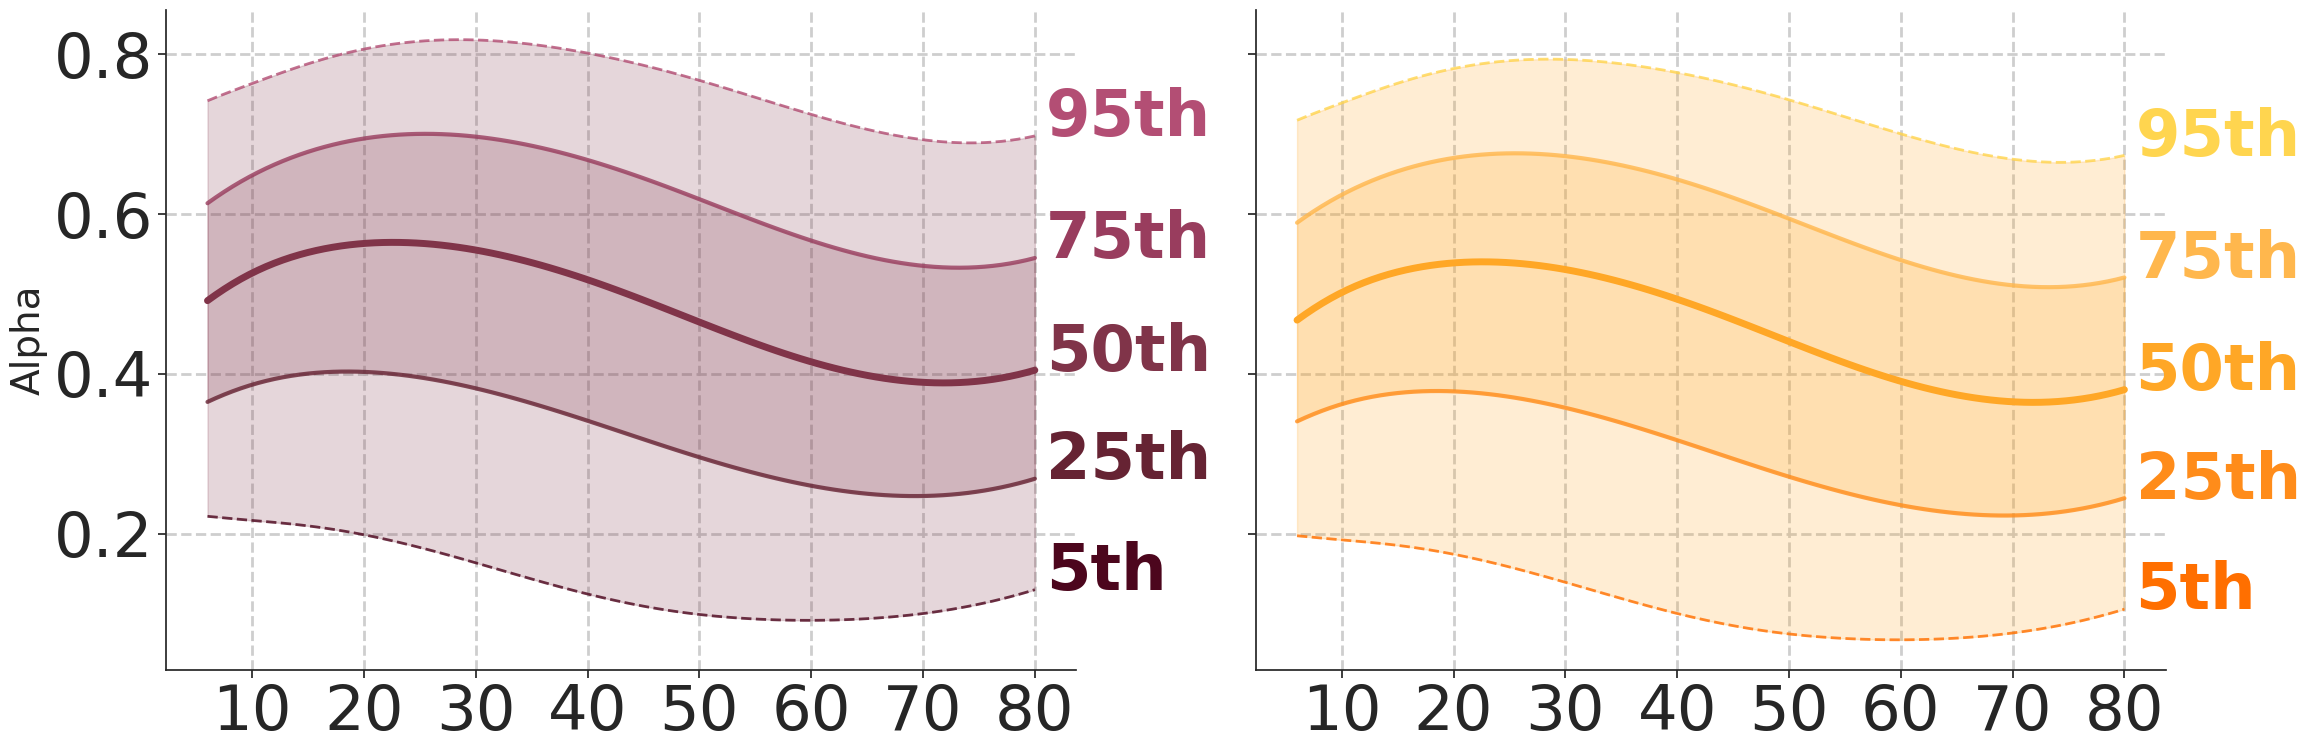

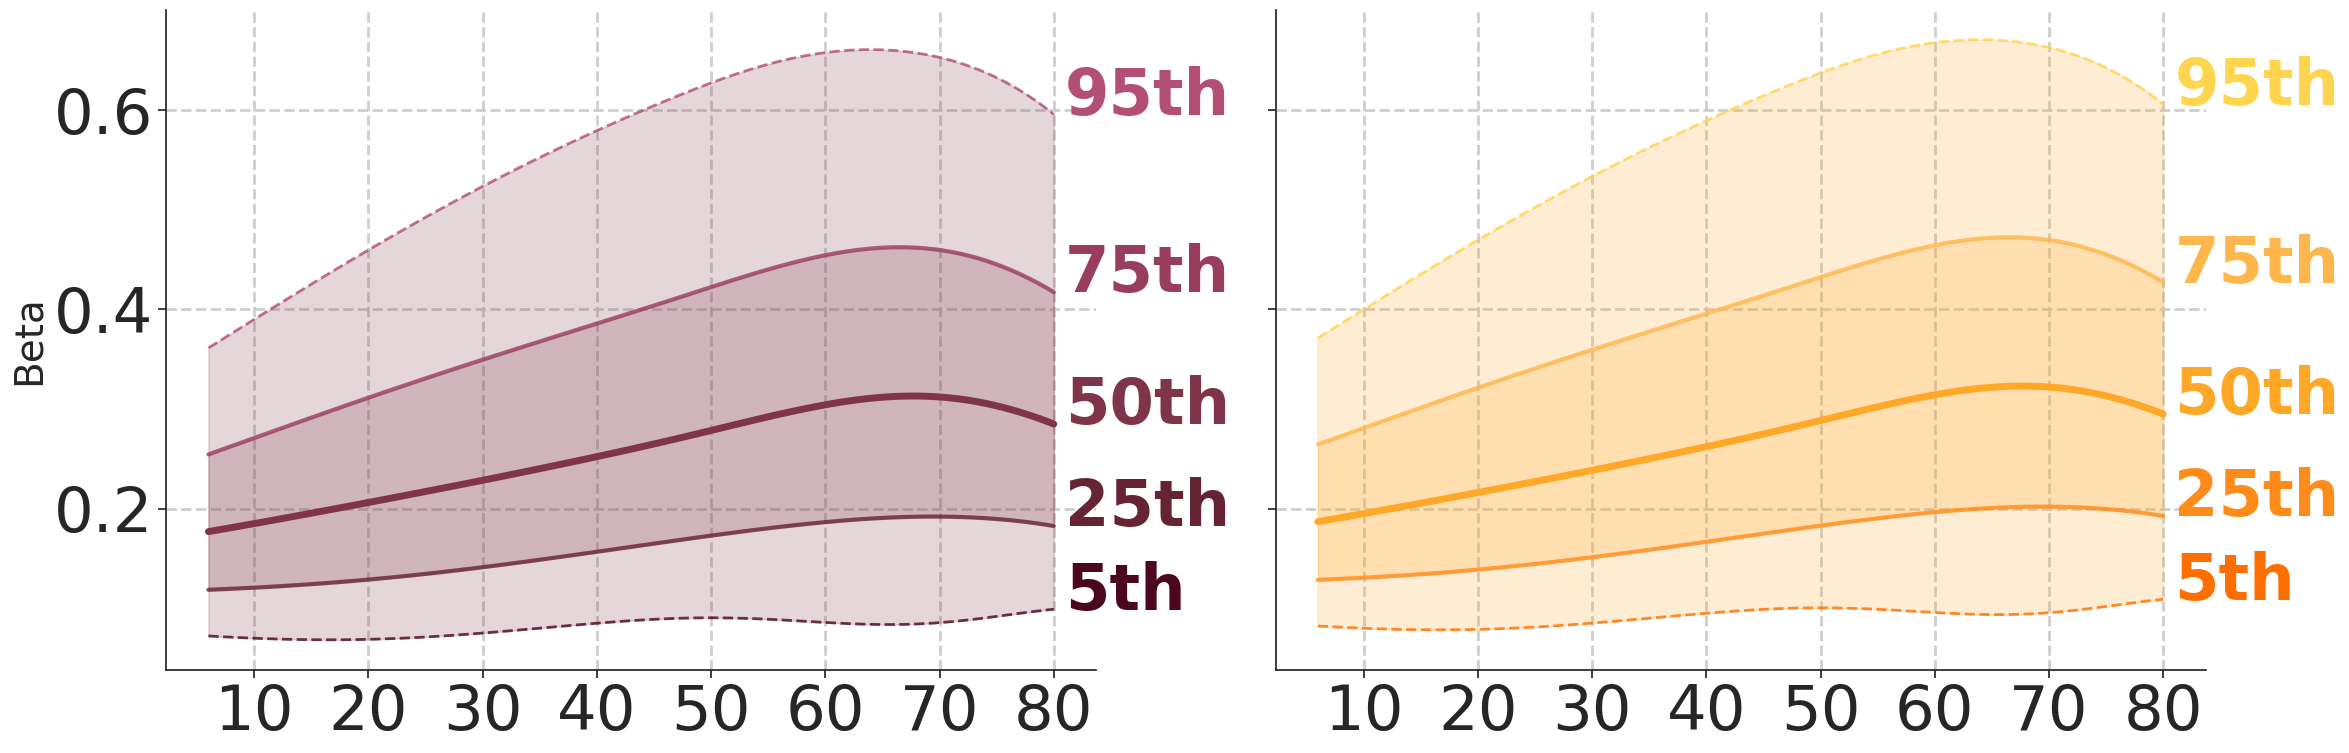

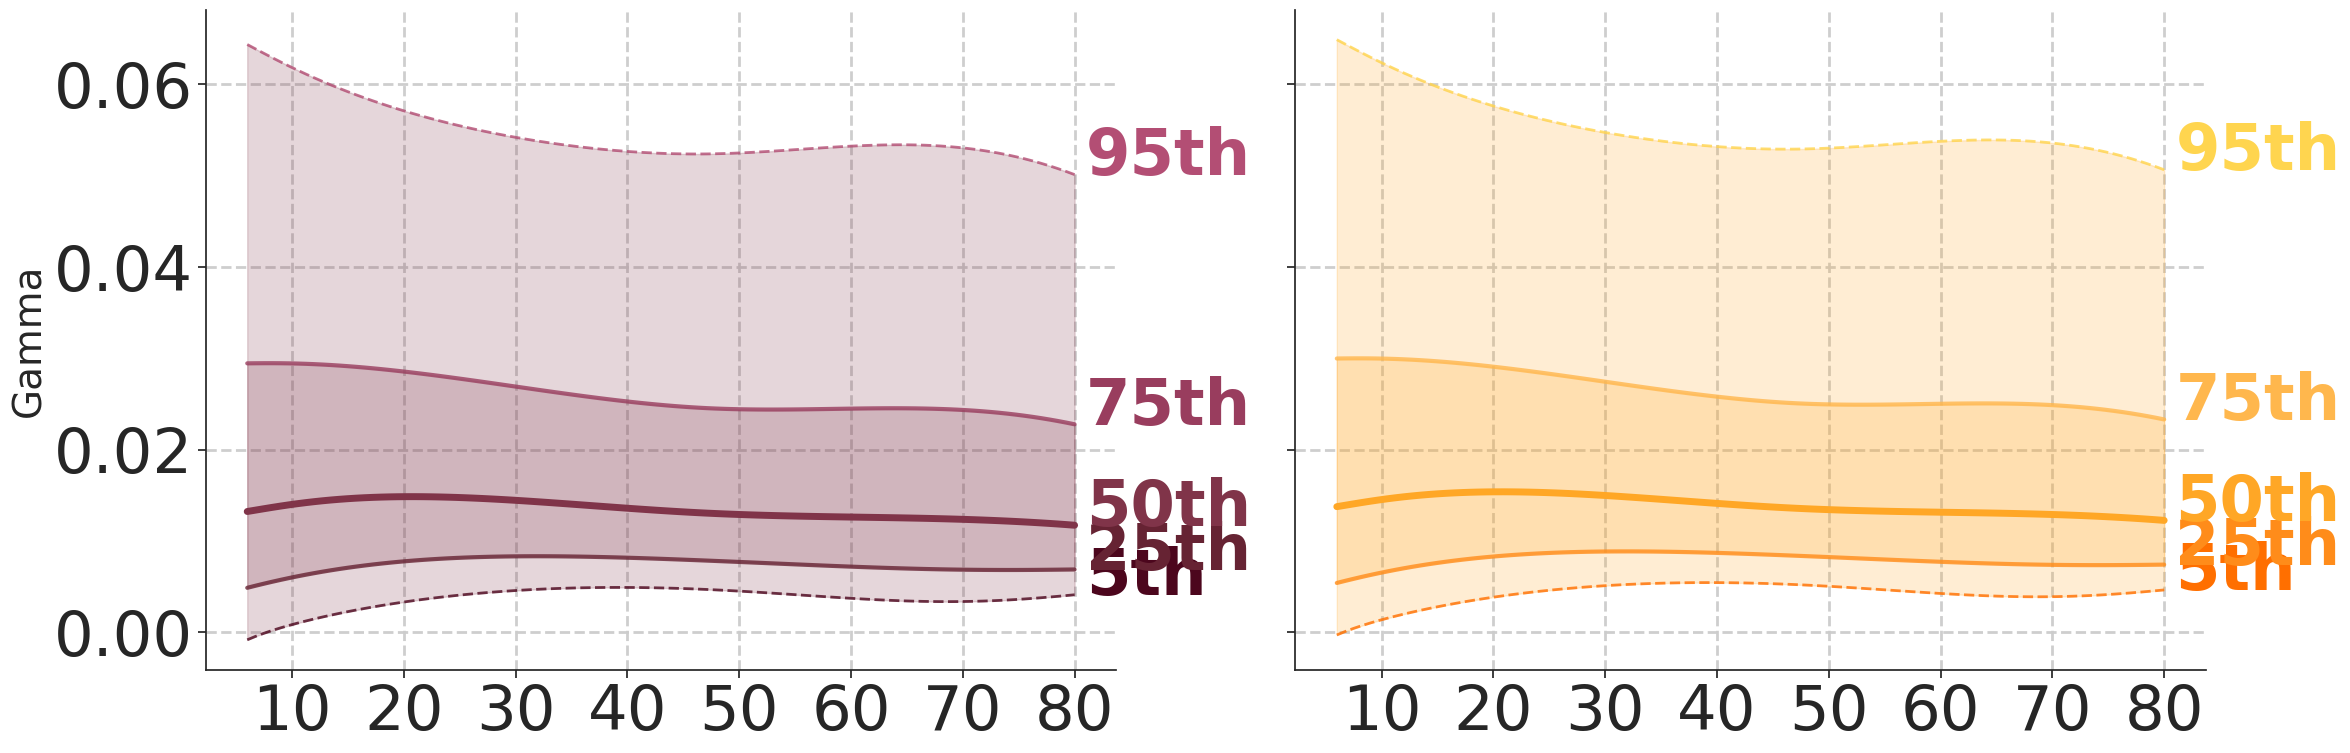

In [4]:
from meganorm.plots.plots import plot_growthcharts

new_names = ["Theta", "Alpha", "Beta", "Gamma"]
quantiles_path = "data/figure_3/figure_3a"
plot_growthcharts(quantiles_path, 
                model_indices = list(range(len(new_names))), 
                biomarker_names = new_names, 
                site = None, 
                point_num  = 100, 
                number_of_sexs = 2, 
                num_of_sites = 6,
                colors = {"male": ['#4c061d', '#662333', '#803449', '#993d5e', '#b34e74'],
                        "female": ["#FF6F00", "#FF8C1A", "#FFA726", "#FFB74D", "#FFD54F"]},
                suffix="estimateAll",
                )

### Figure 3b

In [5]:
with open("data/figure_3/figure_3b/oscilograms.pkl", "rb") as file:
    oscilograms = pkl.load(file)

with open("data/figure_3/figure_3b/age_slices.pkl", "rb") as file:
    age_slices = pkl.load(file)

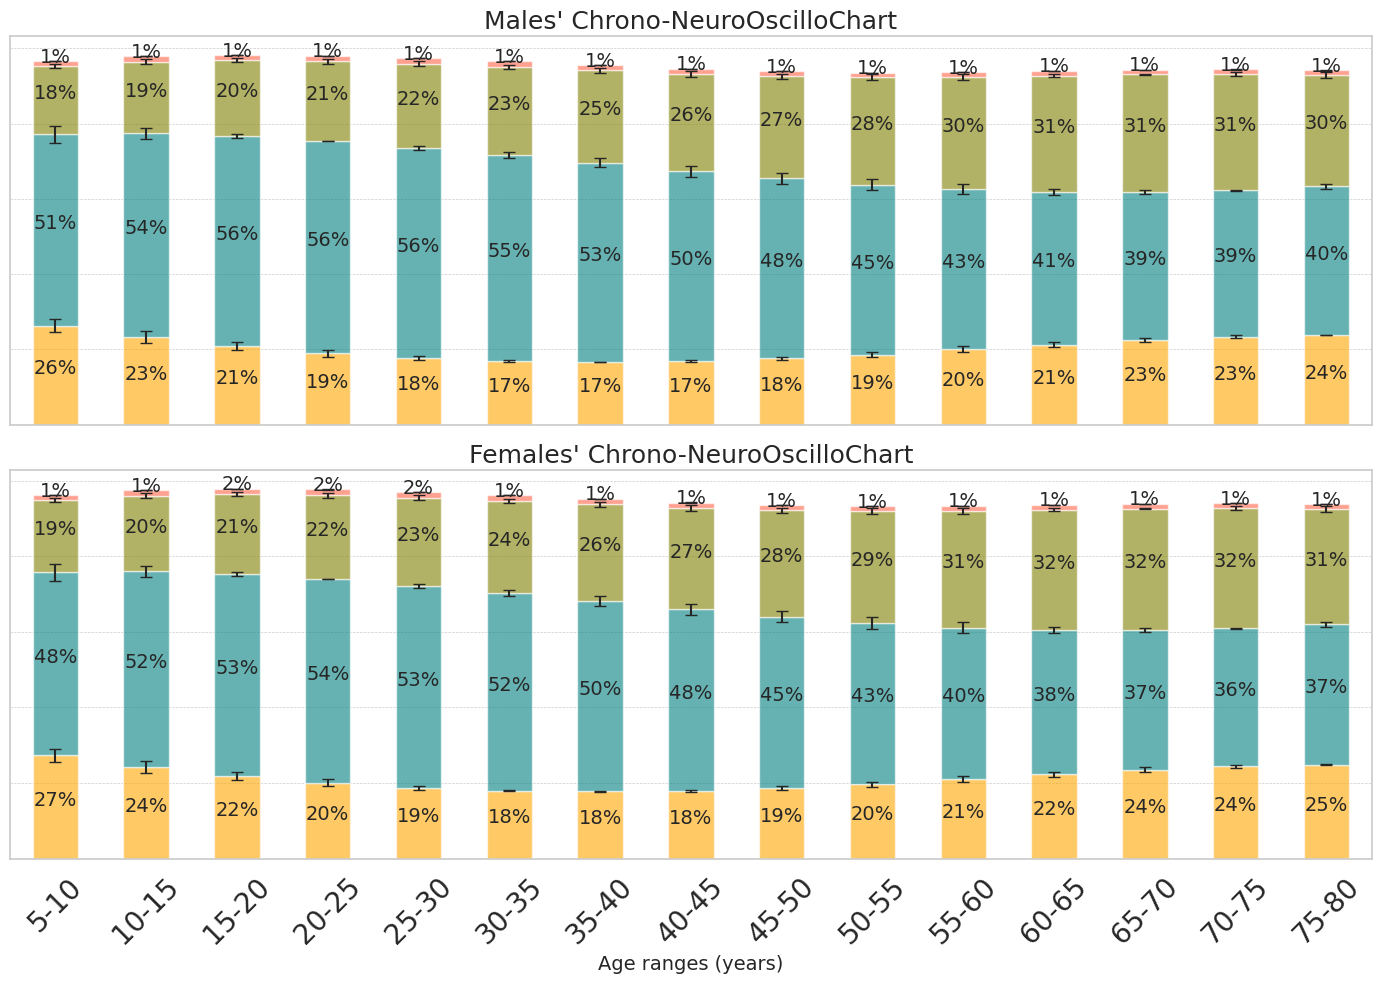

In [6]:
from meganorm.plots.plots import plot_PNOCs

plot_PNOCs(oscilograms, age_slices, save_path="data/figure_3/figure_3b")

### Figure 3c

In [7]:
with open("data/figure_3/figure_3c/data.pkl", "rb") as file:
    data = pkl.load(file)

with open("data/figure_3/figure_3c/centiles.pkl", "rb") as file:
    statistics = pkl.load(file)

from meganorm.plots.plots import plot_INOCs

biomarker_names = [
    "Adjusted_Canonical_Relative_PowerTheta_all",
    "Adjusted_Canonical_Relative_PowerAlpha_all",
    "Adjusted_Canonical_Relative_PowerBeta_all",
    "Adjusted_Canonical_Relative_PowerGamma_all"]

for i, name in enumerate(biomarker_names):

    if biomarker_names[i] == "Adjusted_Canonical_Relative_PowerGamma_all": 
        max_value=0.2
    else: max_value=1

    plot_INOCs(sub_index = name,
                observed_value = data.loc[name],
                q1 = statistics[name][1],
                q3 = statistics[name][3],
                percentile_5 = statistics[name][0],
                percentile_95 = statistics[name][4],
                percentile_50 = statistics[name][2],
                title="",
                max_value=max_value,
                save_path=f"data/figure_3/figure_3c/inocs_for_z_scores/")
                

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Figure 4

### Figure 4a

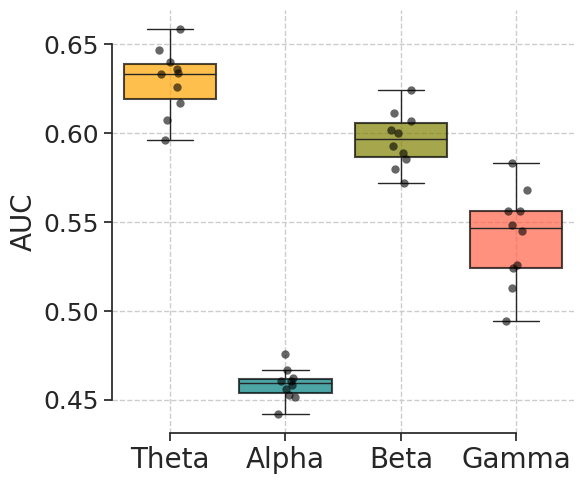

In [8]:
from meganorm.plots.plots import box_plot_auc

figure_4a_path = "data/figure_4/figure_4a/AUC_values_across_10_runs.csv"
aucs = pd.read_csv(figure_4a_path, index_col=0)

box_plot_auc(aucs, 
    save_path=None,
    color=["orange", "teal", "olive", "tomato"],
    alpha=0.7,
    biomarkers_new_name=["Theta", "Alpha", "Beta", "Gamma"])

### Figure 4b

In [9]:
def plot_bar(df_h, df_p, mode, ylabel, legend_labels):
    means_h = df_h.mean()
    means_p = df_p.mean()
    ci_h = df_h.std() / np.sqrt(len(df_h)) * 1.96
    ci_p = df_p.std() / np.sqrt(len(df_p)) * 1.96

    x = np.arange(len(means_h))
    width = 0.3

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(
        x - width / 2,
        means_h,
        yerr=ci_h,
        label=legend_labels[0],
        color="tomato",
        width=width,
        capsize=4,
        alpha=0.8,
    )
    ax.bar(
        x + width / 2,
        means_p,
        yerr=ci_p,
        label=legend_labels[1],
        color="darkslategray",
        width=width,
        capsize=4,
        alpha=0.8,
    )

    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(means_h.index, fontsize=12, rotation=45, ha="right")
    if mode == "positive":
        ax.legend(fontsize=12)
    ax.set_ylim(0, 15)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position(("outward", 5))
    ax.spines["left"].set_position(("outward", 5))
    ax.tick_params(axis="y", labelsize=12)
    ax.grid(axis="y")
    plt.tight_layout()
    plt.show()



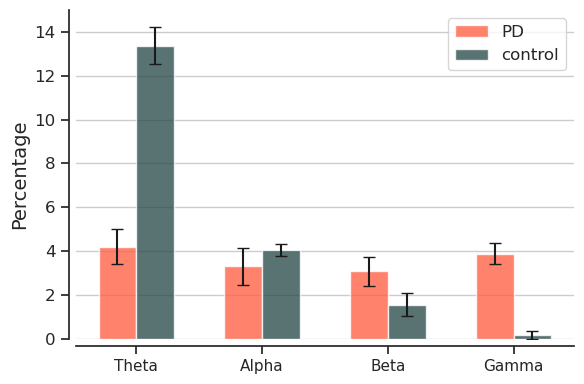

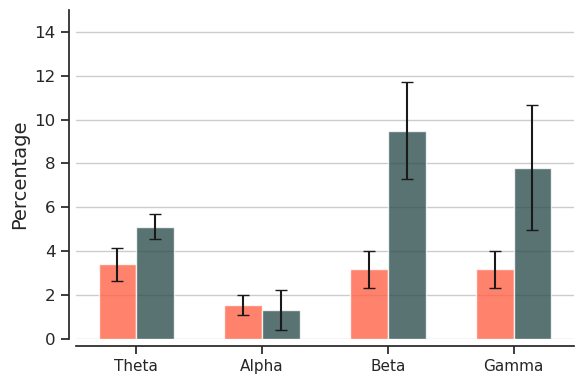

In [10]:
df_p_pos = pd.read_csv("data/figure_4/figure_4b/percentage_of_positive_extreme_statistics_across_10_runs_patients.csv", index_col=0)
df_p_neg = pd.read_csv("data/figure_4/figure_4b/percentage_of_negative_extreme_statistics_across_10_runs_patients.csv", index_col=0)
df_c_pos = pd.read_csv("data/figure_4/figure_4b/percentage_of_positive_extreme_statistics_across_10_runs_controls.csv", index_col=0)
df_c_neg = pd.read_csv("data/figure_4/figure_4b/percentage_of_negative_extreme_statistics_across_10_runs_controls.csv", index_col=0)

legends = ["PD", "control"]

plot_bar(df_c_pos, df_p_pos, "positive", "Percentage", legend_labels=legends)
plot_bar(df_c_neg, df_p_neg, "negative", "Percentage", legend_labels=legends)

### Figure 4c

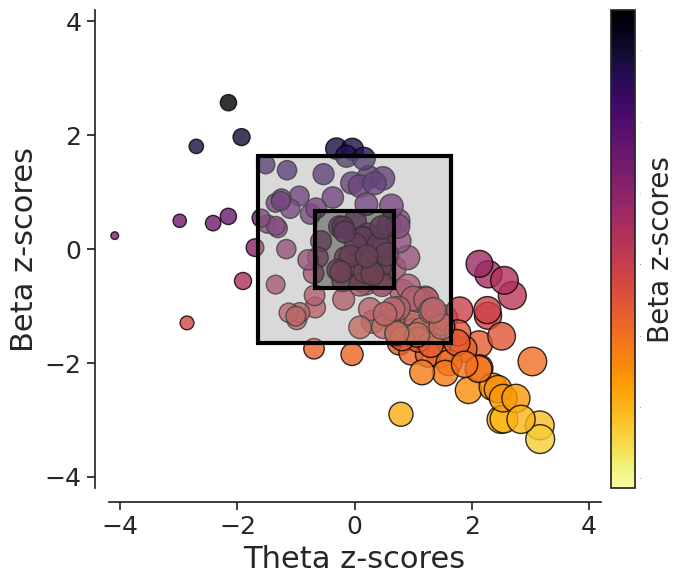

In [11]:
from meganorm.plots.plots import z_scores_scatter_plot

deviation_scores = pd.read_csv("data/figure_4/figure_4c/Theta_Beta_deviation_scores.csv")

z_scores_scatter_plot(X = list(deviation_scores.loc[:, "Adjusted_Canonical_Relative_PowerTheta_all"]),
                    Y = list(deviation_scores.loc[:, "Adjusted_Canonical_Relative_PowerBeta_all"]),
                    bands_name=["Theta", "Beta"], 
                    lower_lim = -4.2,
                    upper_lim = 4.2,
                    ticks = [-4, -2, 0, 2, 4])

# Figure 5

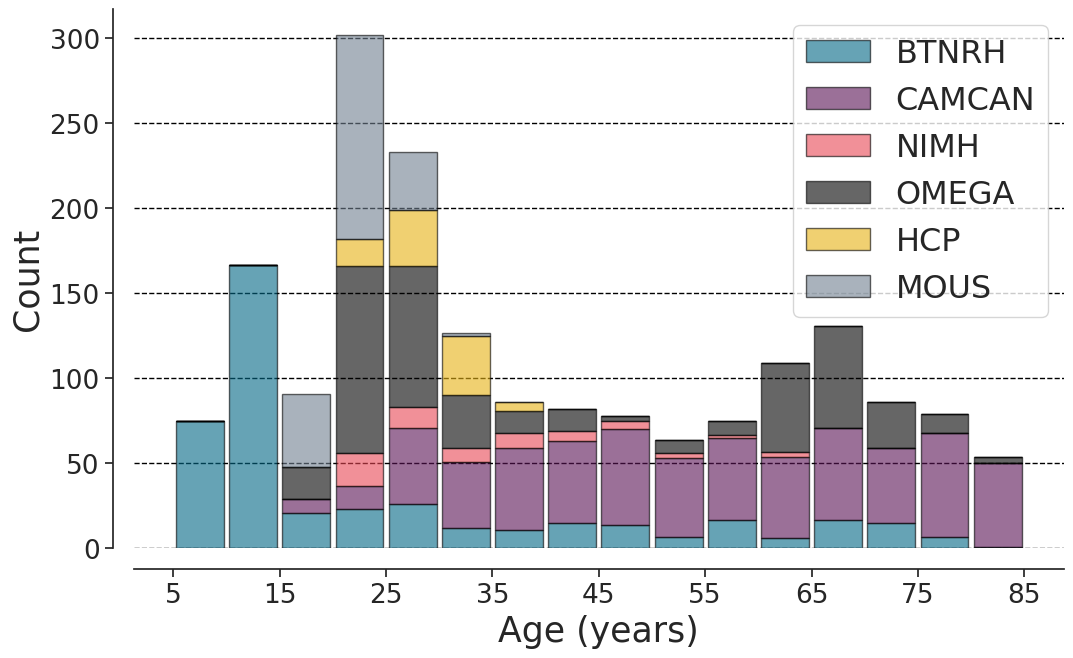

In [12]:
from meganorm.plots.plots import plot_age_hist

age_data = pd.read_csv("data/figure_5/age_data.csv", index_col=0)
age_data["age"] = age_data["age"]*100

plot_age_hist(
    df = age_data,
    site_names=['BTNRH', 'CAMCAN', 'NIMH', 'OMEGA', 'HCP', 'MOUS'],
    lower_age_range= 5,
    save_path="data/figure_5",
    upper_age_range = 90,
    step_size= 5,
    colors= ["#006685", "#591154", "#E84653", "black", "#E6B213", "slategrey"],
)

# Figure 7

### Figure 7a

In [13]:
def plot_ap_r2(fixed_r2s, knee_r2s):
    """
    Returns stacked histogram of R2 scors for aperiodic and periodic
    components
    """
    plt.figure(figsize=(6, 7))
    plt.hist(
        fixed_r2s, bins=100, color="#A9561E", alpha=0.6, label="Aperiodic - fixed mode"
    )
    plt.hist(knee_r2s, bins=100, color="teal", alpha=0.6, label="Aperiodic - knee mode")
    plt.xlim((0.85, 1.01))
    plt.xlabel("$R^2$ value", fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.legend(fontsize=16)
    plt.xticks([0.86, 0.9, 0.95, 1])
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    plt.grid()
    plt.show()

    return None


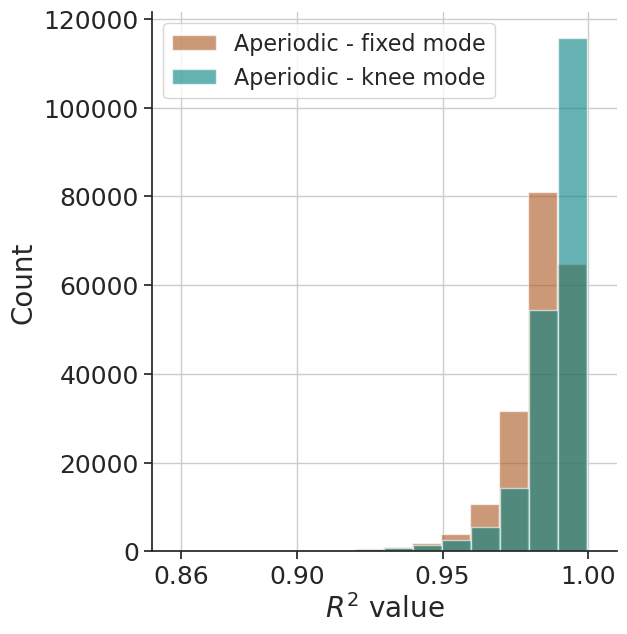

In [14]:
with open("data/figure_7/figure_7a/R2_with_knee.pkl", "rb") as file:
    r2_dict = pkl.load(file)

plot_ap_r2(r2_dict["FoooF_with_fixed"], r2_dict["FoooF_with_knee"])

### Figure 7 b-c

In [15]:
def plot_knee_fixed_psds(
    freqs, psds, fixed_aperiodics, knee_aperiodics
):
    plt.figure(figsize=(8, 7))
    plt.loglog(freqs, psds, color="black", linewidth=2, label="Original PSD")
    plt.loglog(freqs, fixed_aperiodics, color="#A9561E", label="Aperiodic - Fixed mode")
    plt.loglog(freqs, knee_aperiodics, color="teal", label="Aperiodic - Knee mode")
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.xlabel("Frequency", fontsize=22)
    plt.ylabel("Power", fontsize=22)
    plt.legend(fontsize=16)
    plt.grid()
    plt.show()

    return None

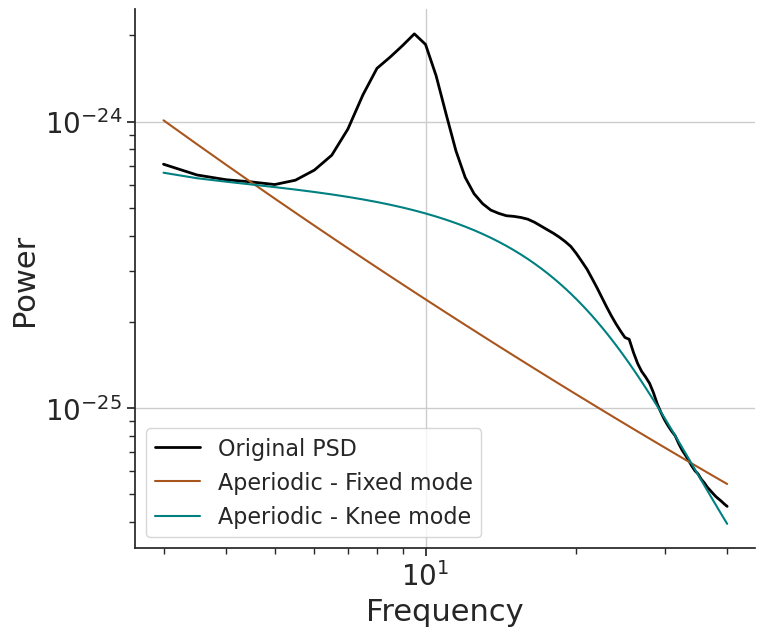

In [16]:
with open("data/figure_7/figure_7b_c/figure_7bc.pkl", "rb") as file:
    fig_7b_dict = pkl.load(file)

plot_knee_fixed_psds(fig_7b_dict["freqs"],
                    fig_7b_dict["original_psd"], 
                    fig_7b_dict["fixed_mode_aperiodic"], 
                    fig_7b_dict["kneee_mode_aperiodic"])